In [1]:
using Pkg
Pkg.activate(joinpath(Pkg.devdir(),"WebotsSim"));

In [10]:
using LightGraphs, MetaGraphs
using DataStructures
using JuMP, MathOptInterface
using Gurobi
using TOML
using Random

using GraphUtils
using TaskGraphs
using CRCBS
using WebotsSim

In [11]:
include(joinpath(dirname(pathof(WebotsSim)),"..","test","notebooks","render_tools.jl"));

# Toy Problem: demo non-zero collection and deposit time

In [14]:
Δt_deliver_1 = 1
Δt_collect_2 = 4
project_spec, problem_spec, robot_ICs, assignments, env_graph = initialize_toy_problem_7(;
    verbose=false,
    Δt_op=0,
    Δt_collect=[0,Δt_collect_2,0],
    Δt_deliver=[Δt_deliver_1,0,0]
    );
env, mapf = construct_search_env(project_spec, problem_spec, robot_ICs, assignments, env_graph)
pc_mapf = PC_MAPF(env,mapf)
node = initialize_root_node(pc_mapf)
solver = PC_TAPF_Solver(verbosity=2)

solution, assignment, cost, search_env = high_level_search!(solver, env_graph, project_spec, problem_spec, robot_ICs, Gurobi.Optimizer);
path1 = convert_to_vertex_lists(solution.paths[1])
path2 = convert_to_vertex_lists(solution.paths[2])
robot_paths = convert_to_vertex_lists(solution);
object_paths = get_object_paths(solution,search_env);
@show path1
@show path2
@show cost

Academic license - for non-commercial use only
HIGH LEVEL SEARCH: iteration 1...
Academic license - for non-commercial use only
HIGH LEVEL SEARCH: Current assignment vector = [1, 2, 3]
HIGH LEVEL SEARCH: Current lower bound cost = 8.0
CBS: node.cost = (8.0, 0.0, 10.0, 0.0)
CBS: Optimal Solution Found! Cost = (8.0, 0.0, 10.0, 0.0)

HIGH LEVEL SEARCH: Best cost so far = 8.0
path1 = [2, 6, 5, 9, 13, 14, 14, 15, 16]
path2 = [9, 10, 10, 10, 10, 10, 11, 12, 12]
cost = (8.0, 0.0, 10.0, 0.0)


(8.0, 0.0, 10.0, 0.0)

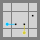

In [17]:
factory_env = construct_factory_env_from_vtx_grid(initialize_dense_vtx_grid(4,4))
set_default_plot_size(4cm,4cm)
visualize_env(search_env,factory_env;robot_paths=robot_paths,object_paths=object_paths)

In [18]:
tf = maximum(map(p->length(p),robot_paths))
set_default_plot_size(4cm,4cm)
# record_video(
#     joinpath(VIDEO_DIR,string("wait_time_demo",".webm")),
#     t->visualize_env(search_env,factory_env,t;robot_paths=robot_paths,object_paths=object_paths);
#     tf=tf,fps=31.25,dt=1/31.25)

Process(`rm -rf /tmp/tmpuuvQ29`, ProcessExited(0))

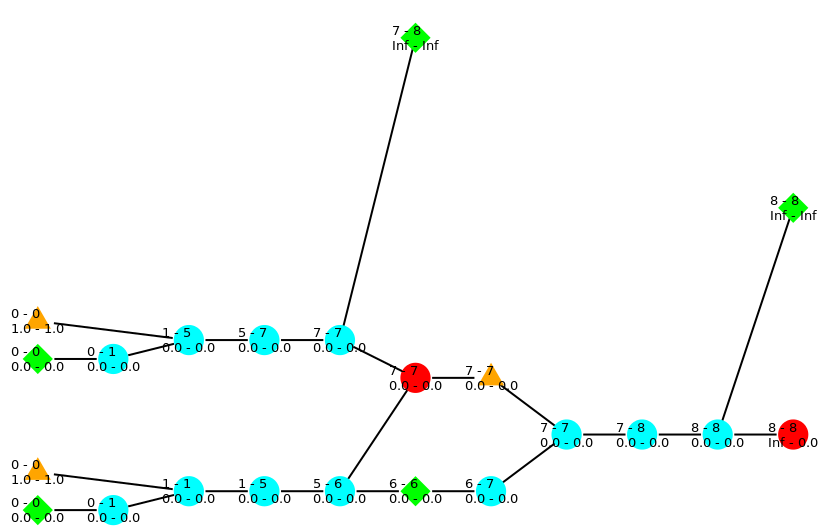

In [5]:
project_schedule=search_env.schedule
rg = get_display_metagraph(project_schedule;f=(v,p)->"",remove_leaf_robots=false)
plot_graph_bfs(rg;
    shape_function=(args...)->get_node_shape(search_env,args...),
    color_function=(args...)->get_node_color(search_env,args...),
    text_function=(args...)->get_node_text(search_env,args...)
    # text_function=(args...)->""
)

# Demo two-headed project